In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_file_path = 'all_pp_posts_left_all_posts.csv'
df_left = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [3]:
# convertendo o tipo data que esta como string em objeto no formato data
df_left["created_time"] = pd.to_datetime(df_left['created_time'])

In [4]:
df_left.head(15)

,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author
0,2018-01-02 20:57:54+00:00,371913239843447_540622342972535,jesse souza canteiro audiovisual lava jato gol...,jesse souza no canteiro audiovisual / a lava j...,96,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,141,0,0,0,1,11,True,left_all_posts
1,2018-01-02 12:02:41+00:00,371913239843447_540414702993299,filho henfil critica blog noblat globo uso obr...,filho de henfil critica blog do noblat - o glo...,22,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.18...,77,0,6,0,1,9,True,left_all_posts
2,2018-01-02 11:46:03+00:00,371913239843447_540408629660573,briga vai ser dura vai ter moleza pra reacada ...,a briga vai ser dura mas nao vai ter moleza pr...,895,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,511,287,4,0,0,62,True,left_all_posts
3,2018-01-02 11:25:24+00:00,371913239843447_540403312994438,geddel ameaca michel temer diz pronto delacao ...,geddel ameaca michel temer e diz que esta pron...,973,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,1002,59,20,3,10,30,True,left_all_posts
4,2018-01-02 11:16:42+00:00,371913239843447_540400076328095,ze dirceu derrotamos ditadura militar vamos pe...,ze dirceu : nos derrotamos a ditadura militar ...,549,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,725,10,2,0,6,46,True,left_all_posts
5,2018-01-03 20:57:47+00:00,371913239843447_541089499592486,deu rio sp minas canada hora comecar julgar pe...,ele deu rio sp e minas ao canada ! ja esta na ...,179,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,232,1,1,9,14,3,True,left_all_posts
6,2018-01-03 20:39:31+00:00,371913239843447_541080749593361,california legalizou maconha vencemos grande d...,a california legalizou a maconha . vencemos . ...,6,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,19,1,0,0,0,2,True,left_all_posts
7,2018-01-03 20:13:18+00:00,371913239843447_541073926260710,anthony garotinho faz grave denuncias contra r...,anthony garotinho faz grave denuncias contra r...,5088,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,1699,52,76,3,18,23,True,left_all_posts
8,2018-01-03 12:27:28+00:00,371913239843447_540909982943771,sugestao nome pagina juizeco,sugestao para o nome da pagina do juizeco,8,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.18...,27,12,0,0,0,2,True,left_all_posts
9,2018-01-03 11:05:08+00:00,371913239843447_540878436280259,joice hasselmann musa mbl colocou pezinhos opo...,joice hasselmann e a musa do mbl que colocou s...,958,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,1511,38,9,7,10,50,True,left_all_posts


In [7]:
n_total_posts = len(df_left)
print('número total de posts: {0}'.format(str(df_left)))

número total de posts:                    created_time                                id  \
0     2018-01-02 20:57:54+00:00   371913239843447_540622342972535   
1     2018-01-02 12:02:41+00:00   371913239843447_540414702993299   
2     2018-01-02 11:46:03+00:00   371913239843447_540408629660573   
3     2018-01-02 11:25:24+00:00   371913239843447_540403312994438   
4     2018-01-02 11:16:42+00:00   371913239843447_540400076328095   
...                         ...                               ...   
76275 2021-10-17 21:19:42+00:00  654339308067228_2079706608863817   
76276 2021-10-17 17:00:01+00:00  654339308067228_2079497375551407   
76277 2021-10-17 16:00:14+00:00  654339308067228_2079489282218883   
76278 2021-10-17 15:20:04+00:00  654339308067228_2079476828886795   
76279 2021-10-17 14:32:00+00:00  654339308067228_2079460458888432   

                                   pre_processed_message  \
0      jesse souza canteiro audiovisual lava jato gol...   
1      filho henfil critica 

In [9]:
n_posts_with_textual_messages = df_left[df_left.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_left[df_left.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 67541
número de posts sem mensagens textuais: 8739


In [10]:
#============================================================================================
# realizando o tf idf no df['pre_processed_message'] do corpus inteiro
#============================================================================================

# tf idf é uma medida estatística que tem o intuito de indicar a importância de uma palavra 
# de um documento em relação a uma coleção de documentos ou em um corpus linguístico.

def sort_columns(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)


def extract_top_n_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

cv = CountVectorizer()

word_count_vector=cv.fit_transform(df_left['pre_processed_message'])

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# you only needs to do this once, this is a mapping of index to 
feature_names=cv.get_feature_names()

# get the document that we want to extract keywords from
corpus=' '.join(df_left['pre_processed_message'])

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([corpus]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_columns(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_top_n_from_vector(feature_names,sorted_items,10)

print("\n===Keywords=== (todos os posts de todos os candidatos no período analisado)")
for key in keywords:
    print(key,keywords[key])
    


/home/lucas/ufop/tcc/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



===Keywords=== (todos os posts de todos os candidatos no período analisado)
brasil 0.201
bolsonaro 0.193
contra 0.139
dcm 0.131
lula 0.126
governo 0.115
dia 0.111
presidente 0.107
paulo 0.106
pais 0.095


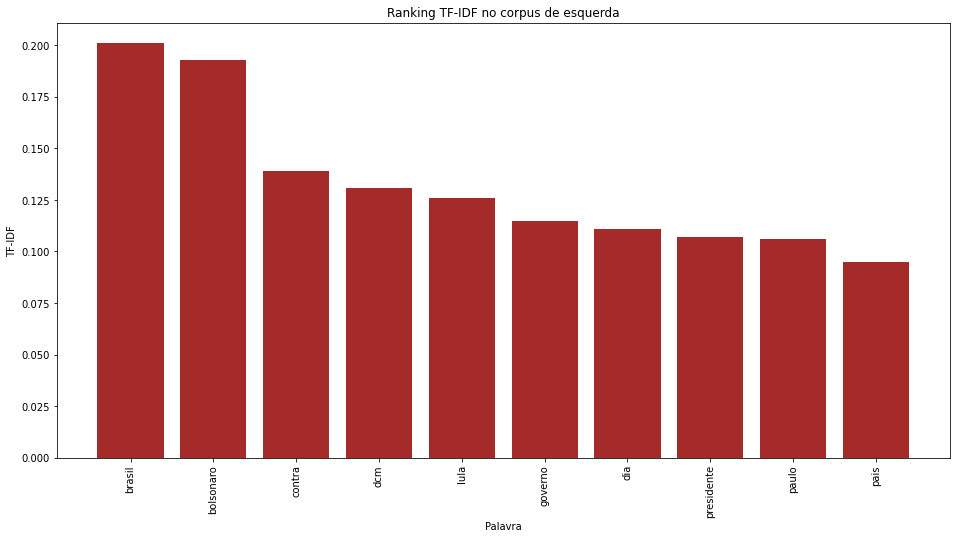

In [48]:
#=======================================================================
# visualização das top palavras
#=======================================================================

words, word_values = key,keywords

words = list(word_values.keys())
word_values = list(word_values.values())

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values,color='#A52A2A');
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Ranking TF-IDF no corpus de esquerda');
ax.set_ylabel('TF-IDF');
ax.set_xlabel('Palavra');


plt.ticklabel_format(style='plain', axis='y')


    
plt.show()

In [29]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

bolsonaro : 12424
brasil : 12316
contra : 7813
lula : 6614
governo : 6078
dia : 5772
presidente : 5590
paulo : 5413
pais : 4773
dcm : 4576
ser : 4562
anos : 4494
pode : 4275
mundo : 3849
hoje : 3544
12424
0.0
12316
1.0
7813
2.0
6614
3.0
6078
4.0
5772
5.0
5590
6.0
5413
7.0
4773
8.0
4576
9.0
4562
10.0
4494
11.0
4275
12.0
3849
13.0
3544
14.0


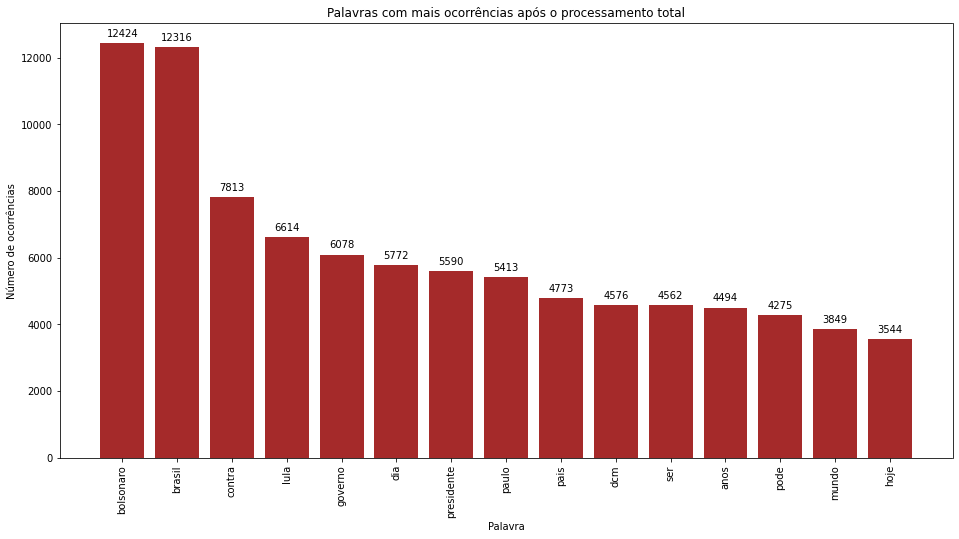

In [36]:
#=======================================================================
# visualização das top palavras
#=======================================================================

count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df_left['pre_processed_message'])

for index in range(len(word_values)):
    print('{0} : {1}'.format(str(words[index]),str(word_values[index])))
    
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values,color='#A52A2A');
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Palavras com mais ocorrências após o processamento total');
ax.set_xlabel('Palavra');
ax.set_ylabel('Número de ocorrências');

for rect in ax.patches:
    height = rect.get_height()
    print(height)
    print(rect.get_x()+rect.get_width()/2)
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()